In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
print('NumPy:', np.__version__, '| Pandas:', pd.__version__, '| Matplotlib:', plt.matplotlib.__version__)

NumPy: 2.2.6 | Pandas: 2.3.3 | Matplotlib: 3.10.8


In [32]:
np.random.seed(42)
data = {
    'Month': ['Jan','Feb','Mar','Apr','May','Jun'],
    'Sales': np.random.randint(10000, 50000, 6),
    'Expenses': np.random.randint(5000, 30000, 6),
    'Customers': np.random.randint(100, 500, 6),
    'Region': np.random.choice(['North','South','East','West'], 6)
}
df = pd.DataFrame(data)
df['Profit'] = df['Sales'] - df['Expenses']
df['Profit_margin'] = (df['Profit'] / df['Sales'] * 100).round(2)
print(df)

  Month  Sales  Expenses  Customers Region  Profit  Profit_margin
0   Jan  25795      9426        249   West   16369          63.46
1   Feb  10860     26962        408   West  -16102        -148.27
2   Mar  48158     19423        357  North   28735          59.67
3   Apr  21284     16363        443  North    4921          23.12
4   May  16265     21023        393   West   -4758         -29.25
5   Jun  26850     13322        485  South   13528          50.38


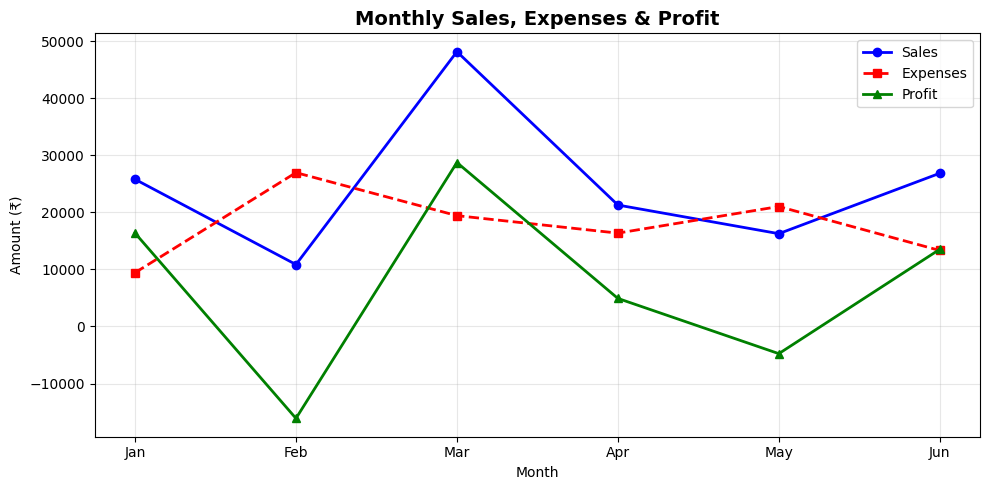

In [33]:
plt.figure(figsize=(10, 5))
plt.plot(df['Month'], df['Sales'], marker='o', color='blue', linewidth=2, label='Sales')
plt.plot(df['Month'], df['Expenses'], marker='s', color='red', linewidth=2, linestyle='--', label='Expenses')
plt.plot(df['Month'], df['Profit'], marker='^', color='green', linewidth=2, label='Profit')
plt.title('Monthly Sales, Expenses & Profit', fontsize=14, fontweight='bold')
plt.xlabel('Month')
plt.ylabel('Amount (₹)')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

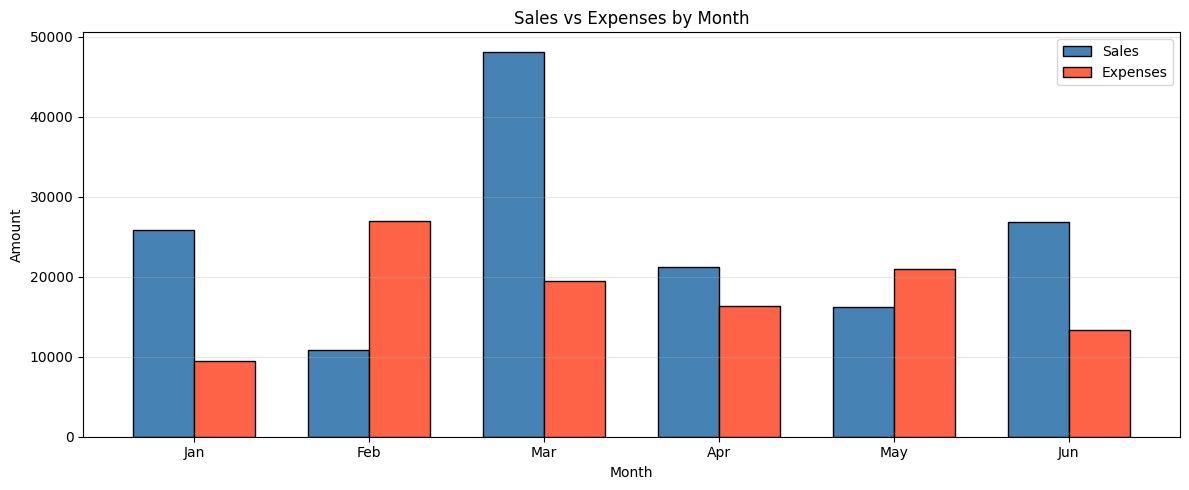

In [34]:
x = np.arange(len(df['Month']))
width = 0.35

fig, ax = plt.subplots(figsize=(12, 5))
bars1 = ax.bar(x - width/2, df['Sales'], width, label='Sales', color='steelblue', edgecolor='black')
bars2 = ax.bar(x + width/2, df['Expenses'], width, label='Expenses', color='tomato', edgecolor='black')

ax.set_xlabel('Month')
ax.set_ylabel('Amount')
ax.set_title('Sales vs Expenses by Month')
ax.set_xticks(x)
ax.set_xticklabels(df['Month'])
ax.legend()
ax.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

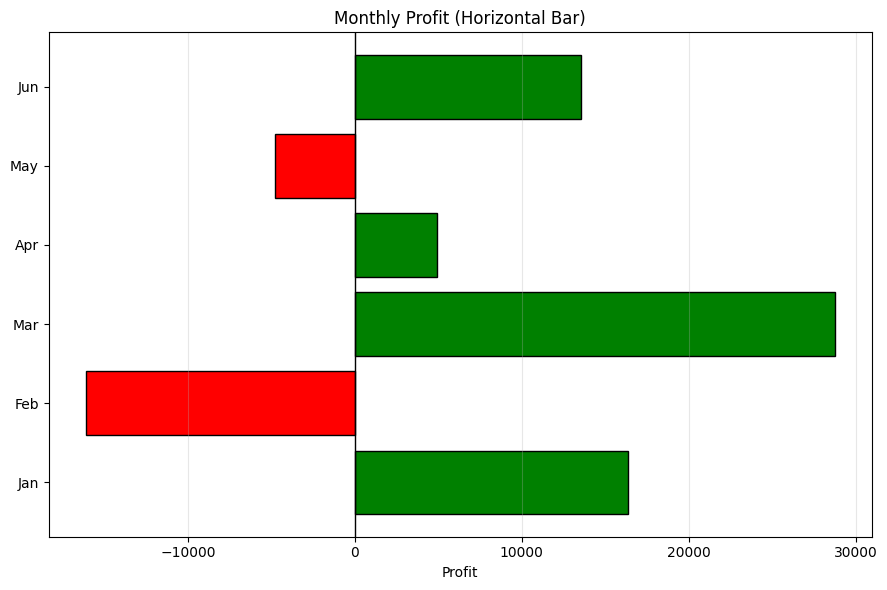

In [35]:
plt.figure(figsize=(9, 6))
colors = ['green' if p > 0 else 'red' for p in df['Profit']]
plt.barh(df['Month'], df['Profit'], color=colors, edgecolor='black')
plt.axvline(0, color='black', linewidth=1)
plt.title('Monthly Profit (Horizontal Bar)')
plt.xlabel('Profit')
plt.grid(axis='x', alpha=0.3)
plt.tight_layout()
plt.show()

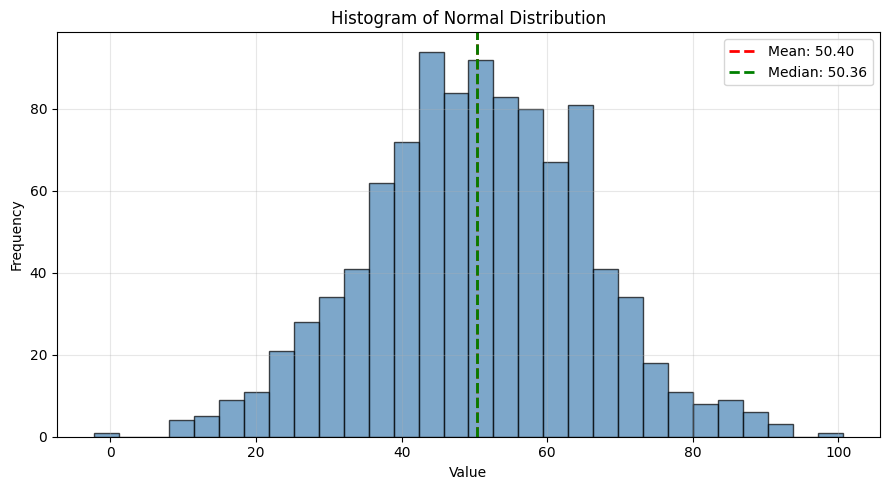

In [36]:
data_norm = np.random.normal(loc=50, scale=15, size=1000)

plt.figure(figsize=(9, 5))
plt.hist(data_norm, bins=30, color='steelblue', edgecolor='black', alpha=0.7)
plt.axvline(np.mean(data_norm), color='red', linestyle='--', linewidth=2, label=f'Mean: {np.mean(data_norm):.2f}')
plt.axvline(np.median(data_norm), color='green', linestyle='--', linewidth=2, label=f'Median: {np.median(data_norm):.2f}')
plt.title('Histogram of Normal Distribution')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

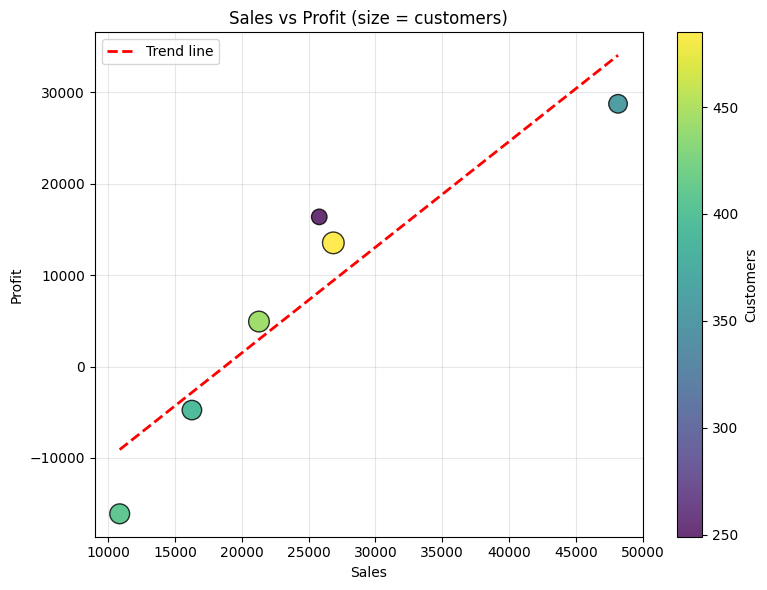

In [37]:
plt.figure(figsize=(8, 6))
scatter = plt.scatter(df['Sales'], df['Profit'],
                      c=df['Customers'], cmap='viridis',
                      s=df['Customers']/2, alpha=0.8, edgecolors='black')
plt.colorbar(scatter, label='Customers')

z = np.polyfit(df['Sales'], df['Profit'], 1)
p = np.poly1d(z)
x_line = np.linspace(df['Sales'].min(), df['Sales'].max(), 100)
plt.plot(x_line, p(x_line), 'r--', linewidth=2, label='Trend line')

plt.title('Sales vs Profit (size = customers)')
plt.xlabel('Sales')
plt.ylabel('Profit')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

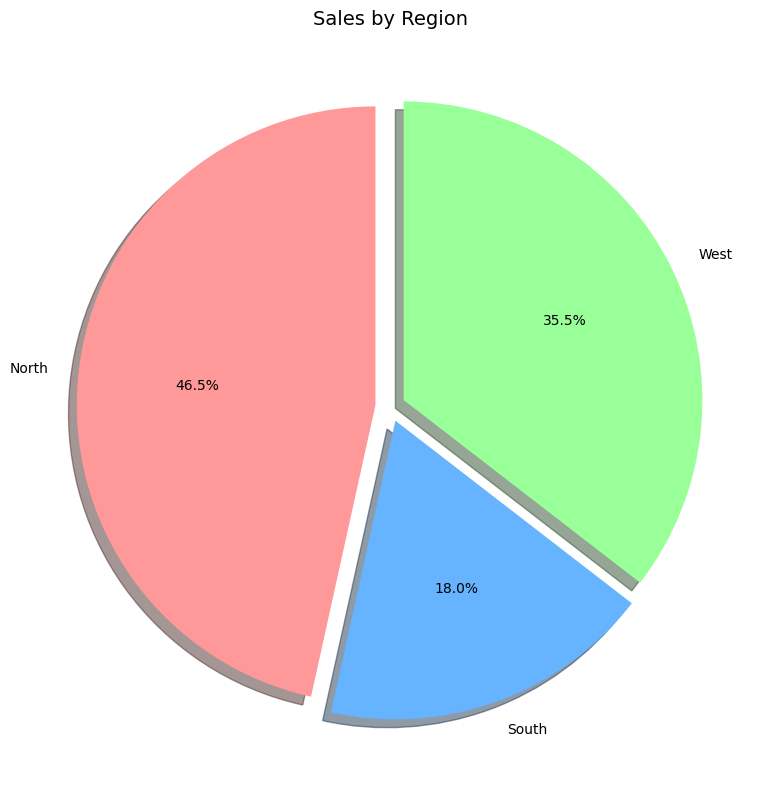

In [38]:
region_sales = df.groupby('Region')['Sales'].sum()

plt.figure(figsize=(8, 8))
explode = [0.05] * len(region_sales)
plt.pie(region_sales, labels=region_sales.index, autopct='%1.1f%%',
        explode=explode, shadow=True, startangle=90,
        colors=['#ff9999','#66b3ff','#99ff99','#ffcc99'])
plt.title('Sales by Region', fontsize=14)
plt.tight_layout()
plt.show()

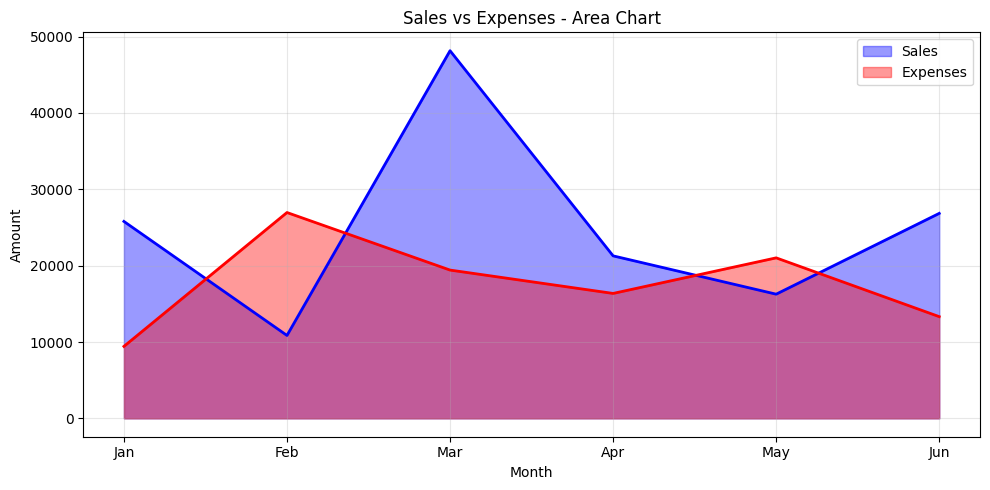

In [39]:
x = np.arange(len(df['Month']))

plt.figure(figsize=(10, 5))
plt.fill_between(x, df['Sales'], alpha=0.4, color='blue', label='Sales')
plt.fill_between(x, df['Expenses'], alpha=0.4, color='red', label='Expenses')
plt.plot(x, df['Sales'], color='blue', linewidth=2)
plt.plot(x, df['Expenses'], color='red', linewidth=2)
plt.xticks(x, df['Month'])
plt.title('Sales vs Expenses - Area Chart')
plt.xlabel('Month')
plt.ylabel('Amount')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

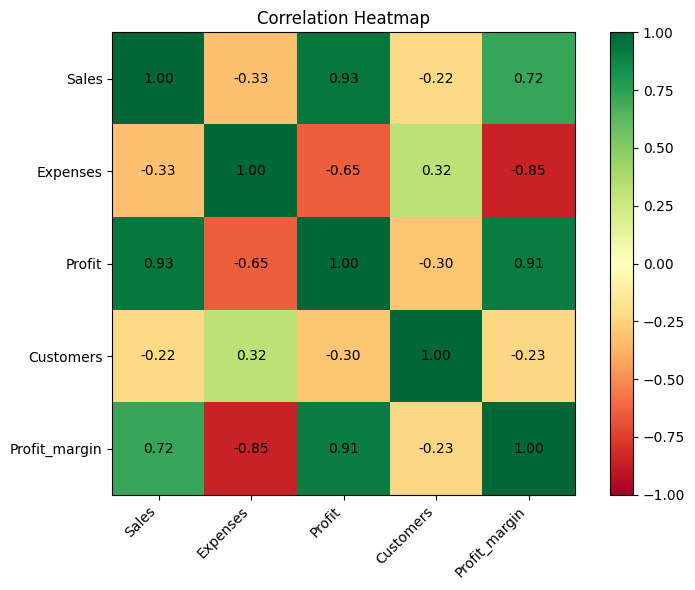

In [40]:

corr = df[['Sales','Expenses','Profit','Customers','Profit_margin']].corr()

fig, ax = plt.subplots(figsize=(8, 6))
im = ax.imshow(corr.values, cmap='RdYlGn', vmin=-1, vmax=1)
plt.colorbar(im)

ax.set_xticks(range(len(corr.columns)))
ax.set_yticks(range(len(corr.columns)))
ax.set_xticklabels(corr.columns, rotation=45, ha='right')
ax.set_yticklabels(corr.columns)

for i in range(len(corr)):
    for j in range(len(corr.columns)):
        ax.text(j, i, f'{corr.values[i,j]:.2f}', ha='center', va='center', fontsize=10)

ax.set_title('Correlation Heatmap')
plt.tight_layout()
plt.show()

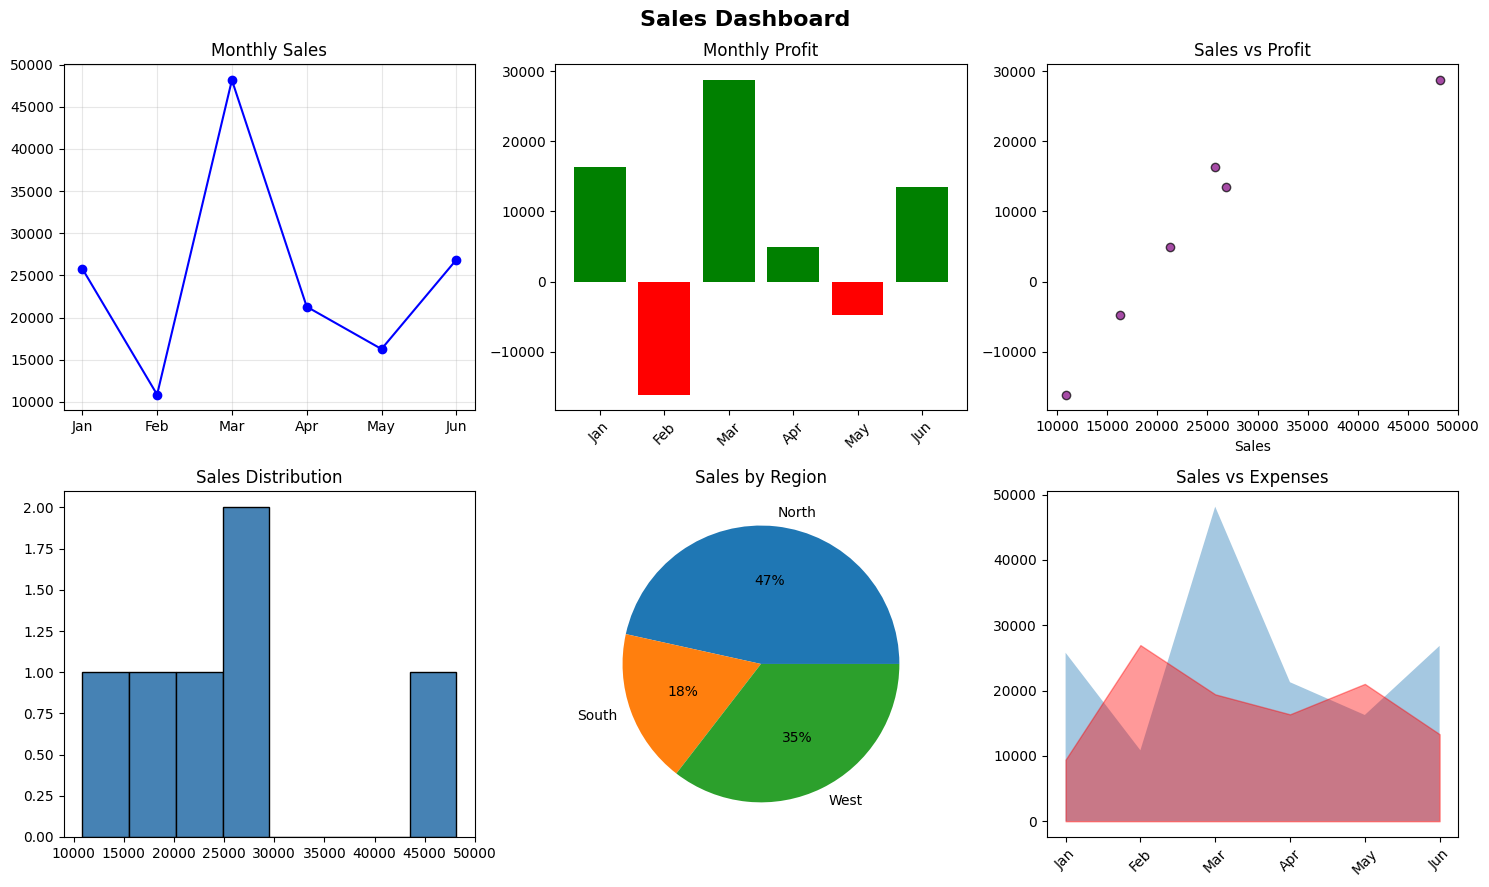

In [41]:
fig, axes = plt.subplots(2, 3, figsize=(15, 9))
fig.suptitle('Sales Dashboard', fontsize=16, fontweight='bold')

axes[0,0].plot(df['Month'], df['Sales'], 'b-o')
axes[0,0].set_title('Monthly Sales')
axes[0,0].grid(True, alpha=0.3)

axes[0,1].bar(df['Month'], df['Profit'], color=['green' if p>0 else 'red' for p in df['Profit']])
axes[0,1].set_title('Monthly Profit')
axes[0,1].tick_params(axis='x', rotation=45)

axes[0,2].scatter(df['Sales'], df['Profit'], c='purple', alpha=0.7, edgecolors='black')
axes[0,2].set_title('Sales vs Profit')
axes[0,2].set_xlabel('Sales')

axes[1,0].hist(df['Sales'], bins=8, color='steelblue', edgecolor='black')
axes[1,0].set_title('Sales Distribution')

region_sales = df.groupby('Region')['Sales'].sum()
axes[1,1].pie(region_sales, labels=region_sales.index, autopct='%1.0f%%')
axes[1,1].set_title('Sales by Region')

axes[1,2].fill_between(range(6), df['Sales'], alpha=0.4)
axes[1,2].fill_between(range(6), df['Expenses'], alpha=0.4, color='red')
axes[1,2].set_title('Sales vs Expenses')
axes[1,2].set_xticks(range(6))
axes[1,2].set_xticklabels(df['Month'], rotation=45)

plt.tight_layout()
plt.show()

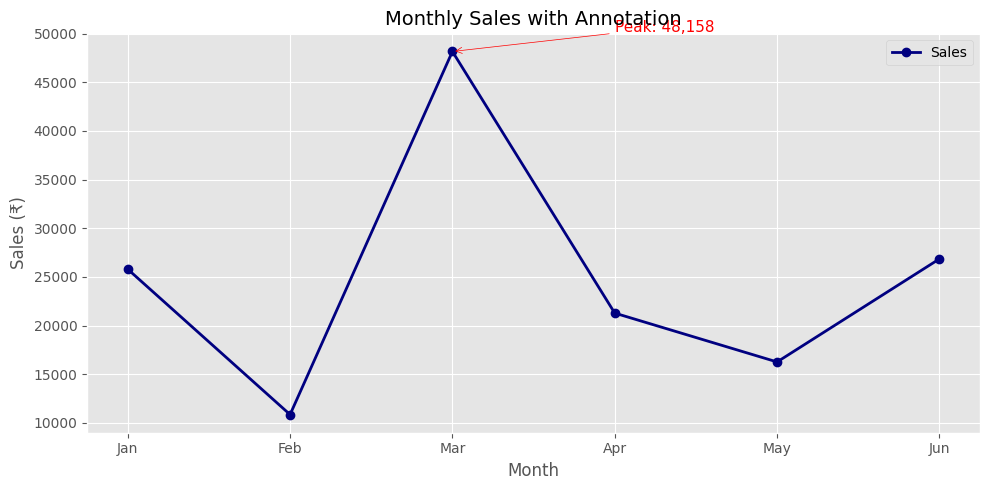

In [42]:
plt.style.use('ggplot')  

fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(df['Month'], df['Sales'], 'o-', linewidth=2, color='navy', label='Sales')

max_idx = df['Sales'].idxmax()
ax.annotate(f"Peak: {df['Sales'][max_idx]:,}",
            xy=(max_idx, df['Sales'][max_idx]),
            xytext=(max_idx+1, df['Sales'][max_idx]+2000),
            arrowprops=dict(arrowstyle='->', color='red'),
            fontsize=11, color='red')

ax.set_title('Monthly Sales with Annotation', fontsize=14)
ax.set_xlabel('Month')
ax.set_ylabel('Sales (₹)')
ax.legend()
plt.tight_layout()
plt.show()
plt.style.use('default')  

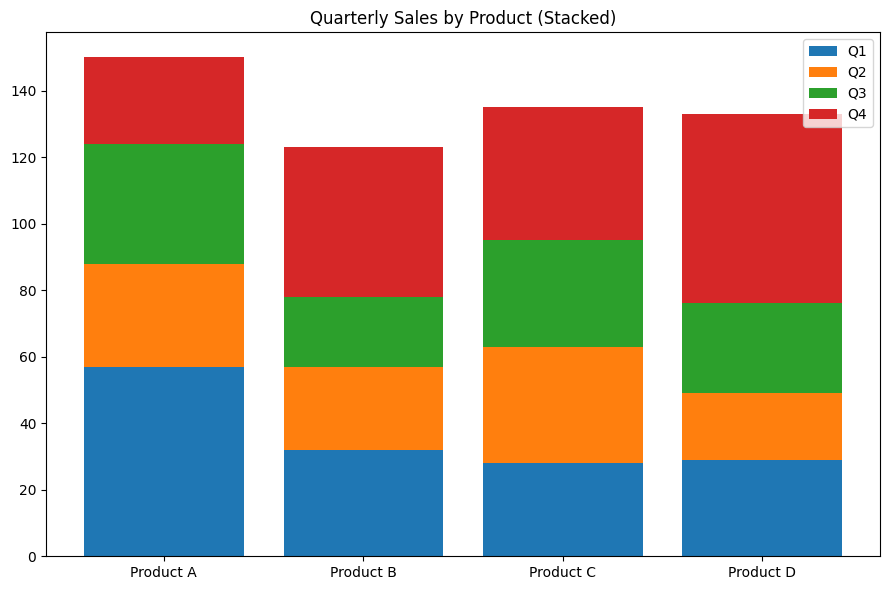

In [43]:
np.random.seed(1)
categories = ['Product A', 'Product B', 'Product C', 'Product D']
q1 = np.random.randint(20, 60, 4)
q2 = np.random.randint(20, 60, 4)
q3 = np.random.randint(20, 60, 4)
q4 = np.random.randint(20, 60, 4)

x = np.arange(len(categories))
fig, ax = plt.subplots(figsize=(9, 6))
ax.bar(x, q1, label='Q1', color='#1f77b4')
ax.bar(x, q2, bottom=q1, label='Q2', color='#ff7f0e')
ax.bar(x, q3, bottom=q1+q2, label='Q3', color='#2ca02c')
ax.bar(x, q4, bottom=q1+q2+q3, label='Q4', color='#d62728')
ax.set_xticks(x)
ax.set_xticklabels(categories)
ax.set_title('Quarterly Sales by Product (Stacked)')
ax.legend()
plt.tight_layout()
plt.show()

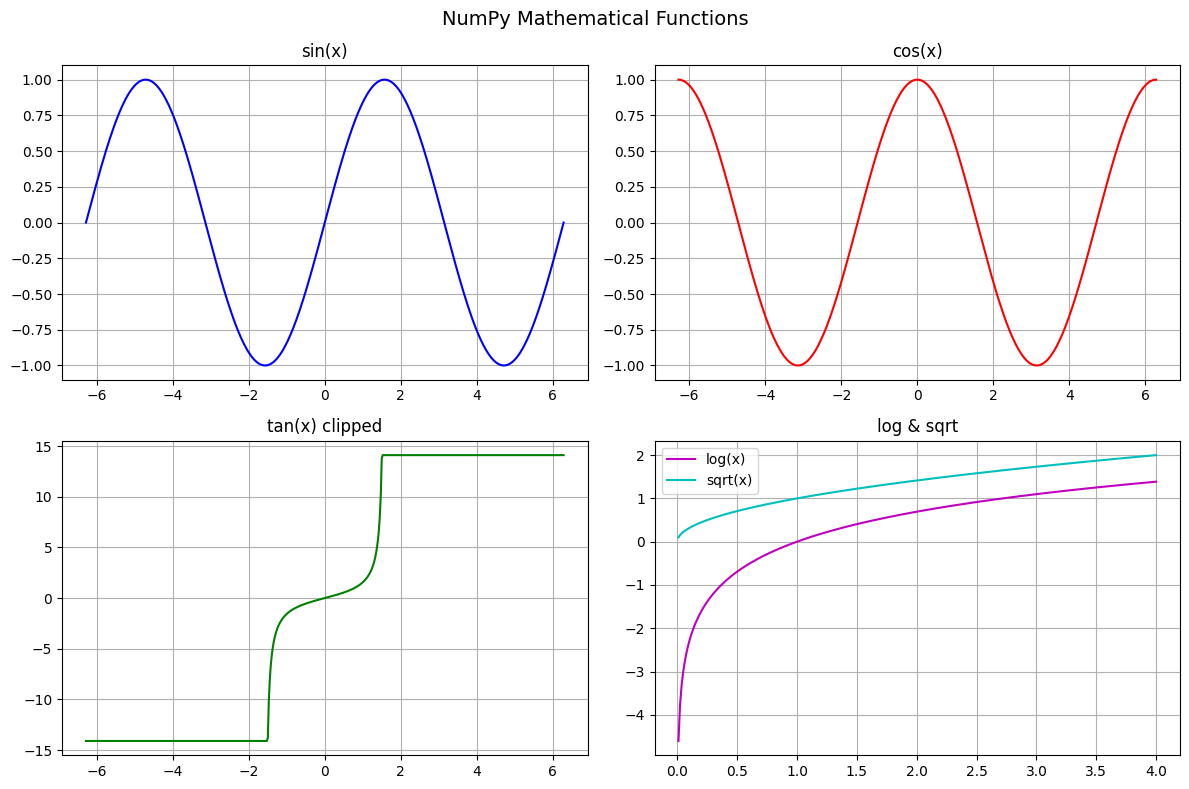

In [44]:
x = np.linspace(-2 * np.pi, 2 * np.pi, 500)

fig, axes = plt.subplots(2, 2, figsize=(12, 8))
fig.suptitle('NumPy Mathematical Functions', fontsize=14)

axes[0,0].plot(x, np.sin(x), 'b'); axes[0,0].set_title('sin(x)'); axes[0,0].grid(True)
axes[0,1].plot(x, np.cos(x), 'r'); axes[0,1].set_title('cos(x)'); axes[0,1].grid(True)
axes[1,0].plot(x, np.tan(np.clip(x, -1.5, 1.5)), 'g'); axes[1,0].set_title('tan(x) clipped'); axes[1,0].grid(True)
x2 = np.linspace(0.01, 4, 300)
axes[1,1].plot(x2, np.log(x2), 'm', label='log(x)')
axes[1,1].plot(x2, np.sqrt(x2), 'c', label='sqrt(x)')
axes[1,1].legend(); axes[1,1].set_title('log & sqrt'); axes[1,1].grid(True)

plt.tight_layout()
plt.show()

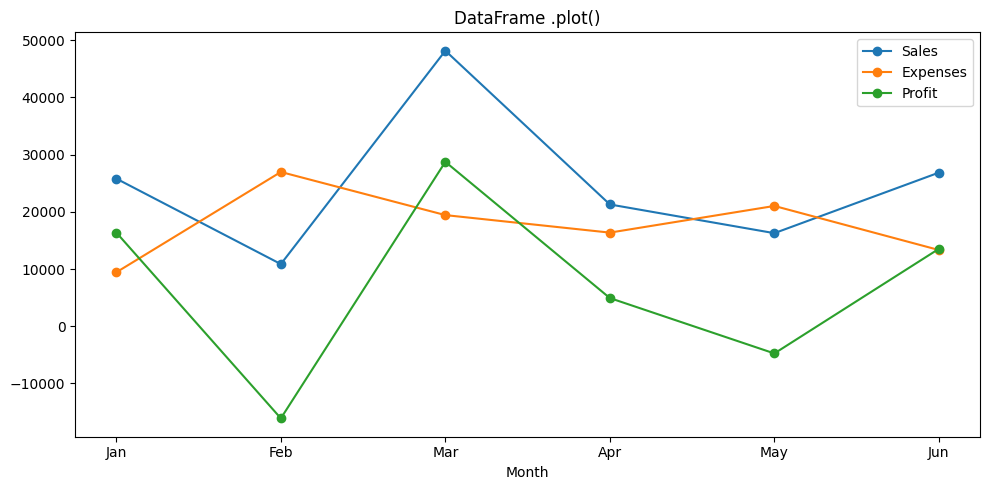

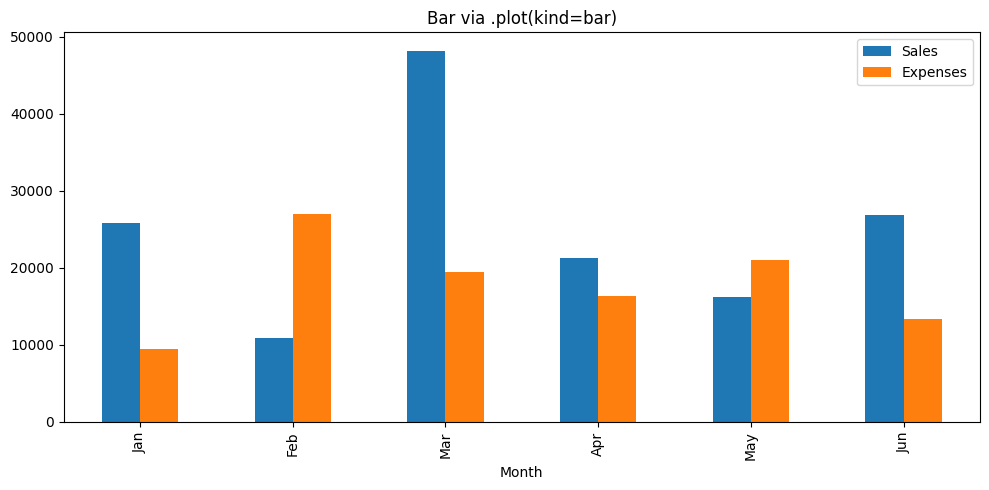

In [45]:

df.set_index('Month')[['Sales','Expenses','Profit']].plot(figsize=(10,5), marker='o', title='DataFrame .plot()')
plt.tight_layout()
plt.show()

df.set_index('Month')[['Sales','Expenses']].plot(kind='bar', figsize=(10,5), title='Bar via .plot(kind=bar)')
plt.tight_layout()
plt.show()

Charts saved successfully!


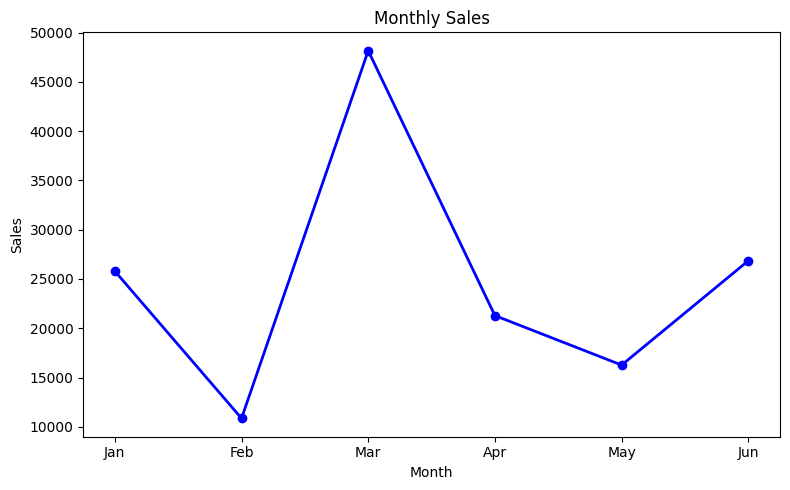

In [46]:
fig, ax = plt.subplots(figsize=(8, 5))
ax.plot(df['Month'], df['Sales'], 'b-o', linewidth=2)
ax.set_title('Monthly Sales')
ax.set_xlabel('Month')
ax.set_ylabel('Sales')
plt.tight_layout()

plt.savefig('sales_chart.png', dpi=300, bbox_inches='tight')
plt.savefig('sales_chart.pdf', bbox_inches='tight')
print('Charts saved successfully!')
plt.show()